# Averaged Artifact Substraction with EEG Data
## First step prepare Jupyter Notebook

In [1]:
import os
from FACET.Facet import Facet
from loguru import logger
import sys

os.getcwd()
os.chdir(os.path.dirname(os.path.abspath("__file__")))

eegDataSet_filepath = "NiazyFMRI.edf"
motiondata_moosmann_filepath = "headmotiondata.tsv"
export_bids_path = "./bids_dir"

#configure logging
logger.remove()
logger.add(sys.stderr, level="INFO")
logger.add("Facet.log", level="DEBUG")

#defining important parameters
window_size = 25 # defines the window size for averaging
upsampling_factor = 10 # defines the resampling factor
relative_trigger_position = -0.01 # defines the relative position of the artefact to the trigger.
relative_window_position = -0.5 # defines the relative position of the averaging window over the epochs.
moosmann_motion_threshold = 0.8 # defines the threshold for moosmann which determines if a motion data entry is significant or not
event_id_description_pairs={'trigger':1} # For exporting as bids. It defines the event id and its description.
regex_trigger_annotation_filter = r'\btrigger\b' # Annotations with the description 'trigger' are considered as triggers, declard for find triggers after reimporting from bids
regex_trigger_event_filter = r'\b1\b' # Events with the value 1 are considered as triggers, declared for edf stim channel
unwanted_bad_channels = ['EKG', 'EMG', 'EOG', 'ECG'] # Channels with these names are considered as bad channels and not considered in the processing
evaluation_measures=["SNR", "RMS", "RMS2", "MEDIAN"] # Measures that must be calculated and used for evaluation.

f = Facet()


## Second Step import EEG Data

2024-03-03 20:40:27.887 | INFO     | FACET.Facet:import_EEG:18 - Importing EEG from NiazyFMRI.edf
2024-03-03 20:40:28.118 | INFO     | FACET.Facet:find_triggers:28 - finding triggers
2024-03-03 20:40:33.021 | INFO     | FACET.Frameworks.Analytics:export_as_bids:71 - Exporting Channels: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG', 'Status']


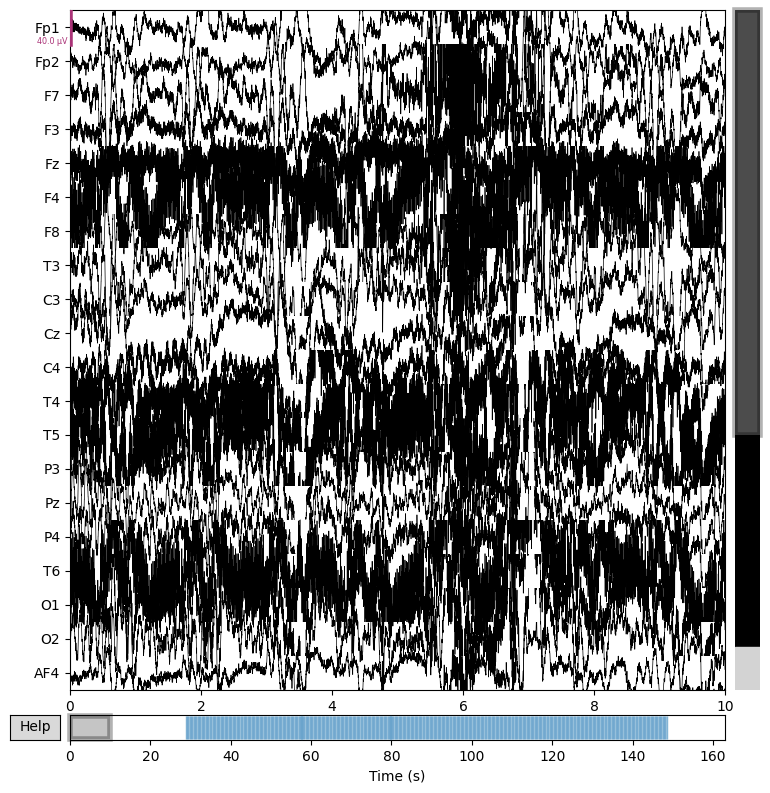

In [2]:
f.import_EEG(eegDataSet_filepath, rel_trig_pos=relative_trigger_position, upsampling_factor=upsampling_factor, bads=unwanted_bad_channels)
f.find_triggers(regex_trigger_event_filter)
eeg = f.get_EEG()
f.export_as_bids(event_id_description_pairs)
f.import_from_bids(rel_trig_pos=relative_trigger_position, bads=unwanted_bad_channels)
eeg = f.get_EEG()

f.plot_EEG(title="after import")

## Third Step Preprocessing

In [3]:
f.pre_processing()


2024-03-03 20:40:42.062 | INFO     | FACET.Frameworks.Correction:highpass:410 - Applying highpass filter
2024-03-03 20:40:42.626 | INFO     | FACET.Frameworks.Correction:upsample:380 - Upsampling Data


## Fourth Step find triggers

In [4]:

f.find_triggers(regex_trigger_annotation_filter) # Using Niazys data
f.get_analytics().print_analytics()
eeg = f.get_EEG()


2024-03-03 20:41:03.724 | INFO     | FACET.Facet:find_triggers:28 - finding triggers
2024-03-03 20:41:04.127 | INFO     | FACET.Frameworks.Analytics:print_analytics:404 - Analytics:
2024-03-03 20:41:04.130 | INFO     | FACET.Frameworks.Analytics:print_analytics:405 - Number of Triggers found: None
2024-03-03 20:41:04.132 | INFO     | FACET.Frameworks.Analytics:print_analytics:406 - Art Length: 3030
2024-03-03 20:41:04.133 | INFO     | FACET.Frameworks.Analytics:print_analytics:407 - Duration of Art in seconds: 0.14794921875
2024-03-03 20:41:04.135 | INFO     | FACET.Frameworks.Analytics:print_analytics:414 - Number of Channels: 32
2024-03-03 20:41:04.136 | INFO     | FACET.Frameworks.Analytics:print_analytics:415 - Channel Names: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG']


## Fourth step apply AAS

In [5]:
f.apply_AAS(window_size=window_size, rel_window_position=relative_window_position)

2024-03-03 20:41:04.150 | INFO     | FACET.Facet:apply_AAS:33 - Applying AAS with method numpy


## Fifth step Remove Artifacts

In [6]:
f.remove_artifacts( )
eeg = f.get_EEG()



## Sixth step Post-Processing

In [7]:
f.post_processing()

2024-03-03 20:41:22.577 | INFO     | FACET.Frameworks.Correction:downsample:369 - Downsampling Data
2024-03-03 20:41:40.553 | INFO     | FACET.Frameworks.Correction:lowpass:396 - Applying lowpassfilter


## Seventh display the processed eeg data

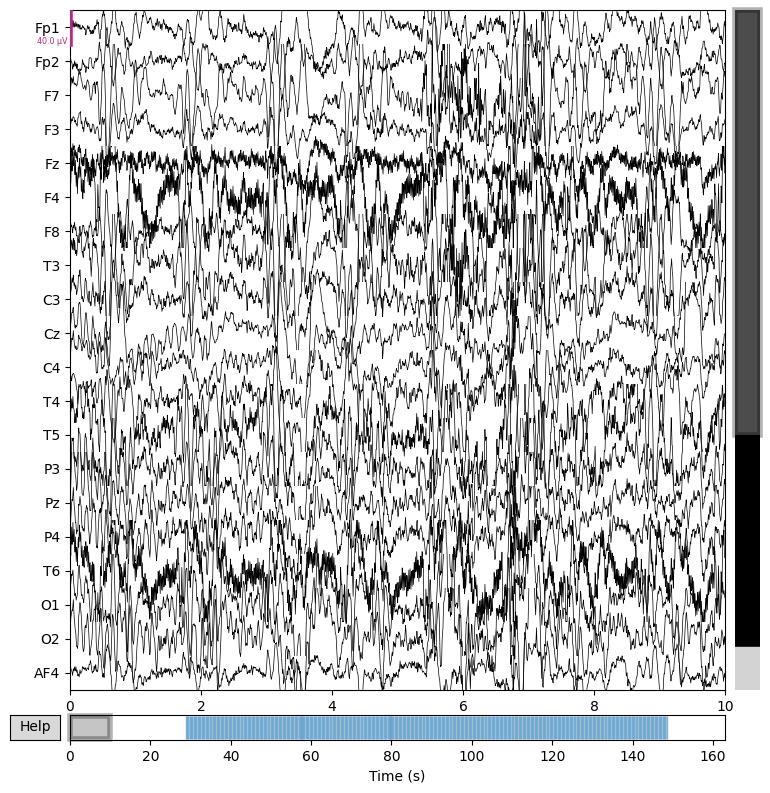

In [8]:
f.plot_EEG(title="after lowpass")

## Eighth Evaluate Results

2024-03-03 20:41:43.442 | INFO     | FACET.Frameworks.Evaluation:add_to_evaluate:31 - ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG']


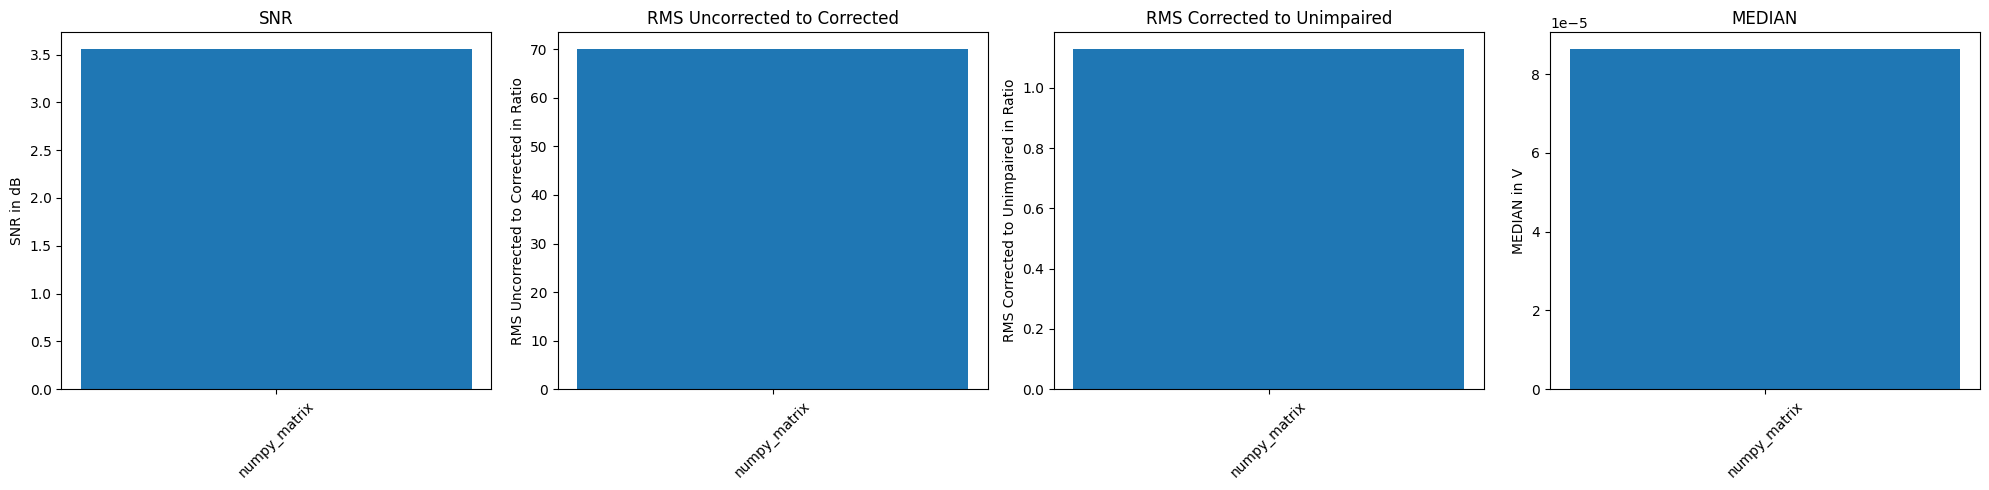

2024-03-03 20:41:44.528 | INFO     | __main__:<module>:3 - [{'Measure': 'SNR', 'Values': [3.5547081926438704], 'Unit': 'dB'}, {'Measure': 'RMS Uncorrected to Corrected', 'Values': [70.00221462222747], 'Unit': 'Ratio'}, {'Measure': 'RMS Corrected to Unimpaired', 'Values': [1.1279627981802625], 'Unit': 'Ratio'}, {'Measure': 'MEDIAN', 'Values': [8.631424203120957e-05], 'Unit': 'V'}]
2024-03-03 20:41:47.397 | INFO     | FACET.Frameworks.Evaluation:add_to_evaluate:31 - ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG']


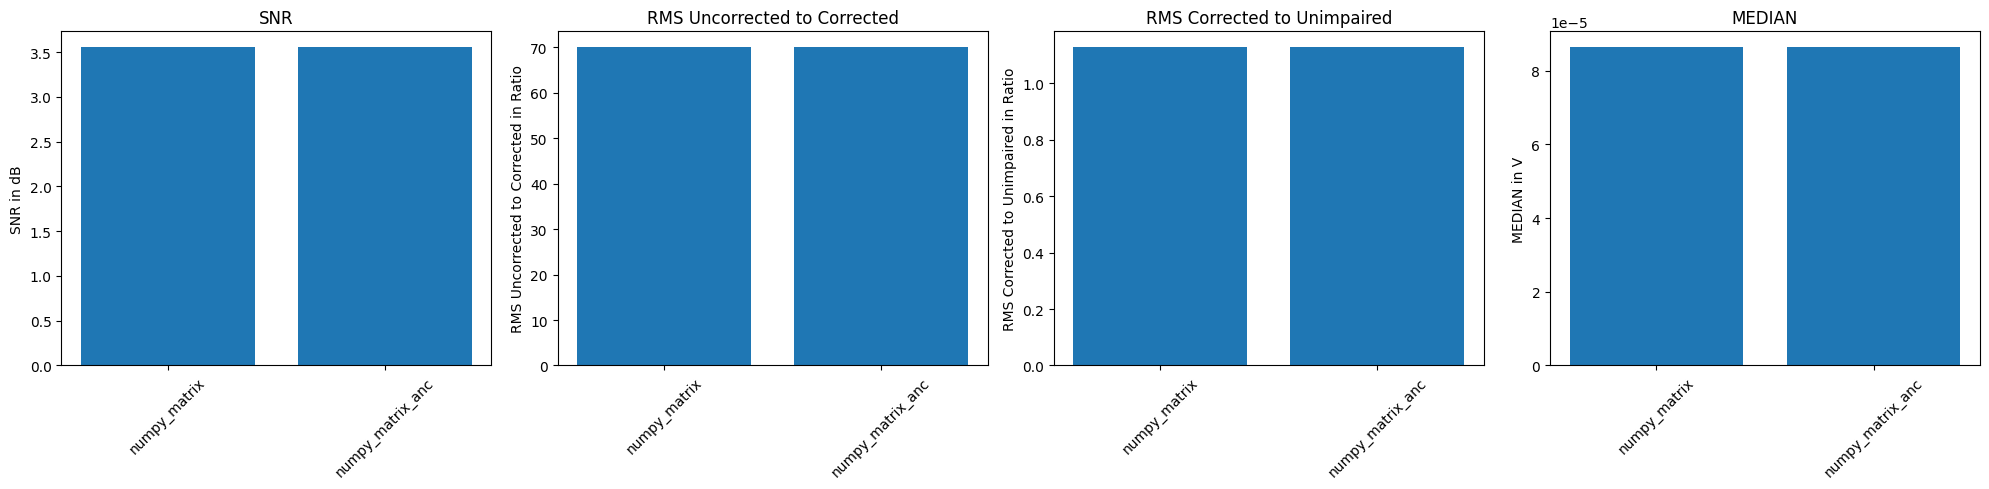

2024-03-03 20:41:48.926 | INFO     | __main__:<module>:6 - [{'Measure': 'SNR', 'Values': [3.5547081926438704, 3.553832928527523], 'Unit': 'dB'}, {'Measure': 'RMS Uncorrected to Corrected', 'Values': [70.00221462222747, 70.00146449758455], 'Unit': 'Ratio'}, {'Measure': 'RMS Corrected to Unimpaired', 'Values': [1.1279627981802625, 1.1279610833425862], 'Unit': 'Ratio'}, {'Measure': 'MEDIAN', 'Values': [8.631424203120957e-05, 8.631424203120957e-05], 'Unit': 'V'}]
2024-03-03 20:41:48.929 | INFO     | FACET.Frameworks.Analytics:export_as_bids:71 - Exporting Channels: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG']


In [9]:
eeg_python = f.get_eeg()
f.add_to_evaluate(eeg_python, name="numpy_matrix") # Matrix will result in >1.0 RMS2 because of python mne inaccuracies
logger.info(f.evaluate(measures=evaluation_measures))
f.get_correction().apply_ANC()#applying ANC
f.add_to_evaluate(f.get_eeg(), name="numpy_matrix_anc")
logger.info(f.evaluate(measures=evaluation_measures))
f.export_as_bids(event_id=event_id_description_pairs, bids_path=export_bids_path)

